## Classification (분류)
[분류문제](https://en.wikipedia.org/wiki/Statistical_classification)

* binary Classification : 분류가 2개!, True or False 
* multi-class Classification : 분류가 3개 (사람, 음식, 개 등등) 이상일 때 
* multi-label Classification : 다중으로 분류가 될 수 있는 것, 신문 기사를 예로 할 때 
어떤 신문 기사는 정치에 포함될 수도 있고, 경제에 포함될 수도 있다! 이럴 때

In [91]:
# 1. 회귀 모델의 아키텍처를 확인
# 2. 입력과 출력의 형태를 만들어준다.
#    - 'X' (입력) : feature / 데이터 (입력)
#    - 'Y' (출력) : 레이블 (lable)   (출력)
# 3. 모델링 단계
#    1) 모델 생성
#    2) 모델 컴파일
#       - 손실 함수 적용
#       - 최적화 프로그램 설정
#       - 평가 지표 생성
#    3) 모델 피팅 (데이터에서 패턴을 찾는 과정)
# 4. 모델 평가
#    1) 모델 시각화
#    2) 학습 곡선 확인
#    3) 예측 결과를 실제 데이터와 비교 (평가 지표 사용)
# 5. 모델 저장 (나중의 사용을 위해서)
# 6. 모델 가져와서 사용하기

* Input Layer (입력층) : 특성 (feature, column, variable)의 갯수 (shape)

* Hidden Layer (은닉층) : 해결하려는 문제에 따라 최소 1개 이상으로 이루어짐 
* 은닉층 각각을 구성하는 뉴런 : 해결하려는 문제에 따라 최소 10 ~ 최대 100으로 이루어진다.
* Output Layer shape (출력층의 형태) : Binary Classification는 1 / Multiclass Classification는 클래스 당 1
* 은닉층 활성화 함수 : [RelU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning)

* 출력층 활성화 함수 : Binary Classification : Signoid / Multiclass Classification : Softmax
* 손실함수 : Binary Classification : tf.keras.losses.BinaryCrossentropy / Multiclass Classification : tf.keras.losses.CategoricalCrossentropy
* 옵티마이저 (최적화) : SGD (stochastic gradient descent), Adam

In [92]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
!pip install scikit-learn

You should consider upgrading via the 'c:\users\user\desktop\git\studycv\cv_week05_2\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [94]:
from sklearn.datasets import make_circles 

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)
X, y, X.shape, y.shape

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [95]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [96]:
circles = pd.DataFrame({
    "X0" : X[:, 0],
    "X1" : X[:, 1],
    "label" : y
})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [97]:
circles.label.value_counts()

0    500
1    500
Name: label, dtype: int64

### 지금까지 라벨 값을 살펴보니 0,1 만 존재 -> binary classfication! 
### (0, 1, 2, 3) -> multiclass classfication

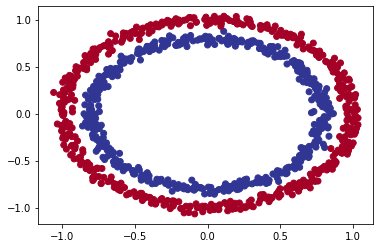

In [98]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [99]:
X.shape, y.shape, len(X), len(y)

((1000, 2), (1000,), 1000, 1000)

In [100]:
# feature 가 2개인 것을 하나의 텐서로 출력으로 본다는 뜻 
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [101]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)

model.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4820


In [102]:
model.fit(X,y, epochs=200, verbose=0)

In [103]:
# 모델을 평가 
model.evaluate(X,y)

## 200번이나 모델을 돌렸는데도 0.5의 정확도

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [104]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)
model.fit(X,y, epochs=200, verbose=0)

In [105]:
model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6935999989509583, 0.5]

In [106]:
# 모델 개선시키기
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),

])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)
model.fit(X,y, epochs=200, verbose=0)

In [107]:
model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.5000


[0.6957396864891052, 0.5]

In [108]:
# 모델 개선시키기 - optimizer 바꾸기 모델 개선시키기 - optimizer 바꾸기
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),

])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)
model.fit(X,y, epochs=100, verbose=0)

In [109]:
model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980249881744385, 0.5080000162124634]

In [110]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_predict = model.predict(x_in)

    if len(y_predict[0]) > 1:
        print("Multiclass classification")
        y_predict = np.argmax(y_predict, axis=1).reshape(xx.shape)
    else :
        print("Binary Classfication")
        y_predict = np.round(y_predict).reshape(xx.shape)

    plt.contourf(xx, yy, y_predict, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

Binary Classfication


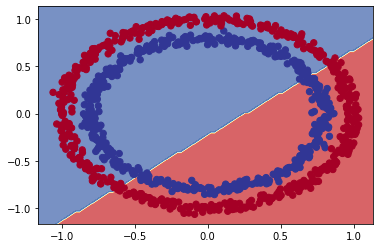

In [111]:
plot_decision_boundary(model, X, y)

In [112]:
# 회귀 모델로 만들어야 밑 코드가 돌아감
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),

])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

In [113]:
tf.random.set_seed(42)

X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)

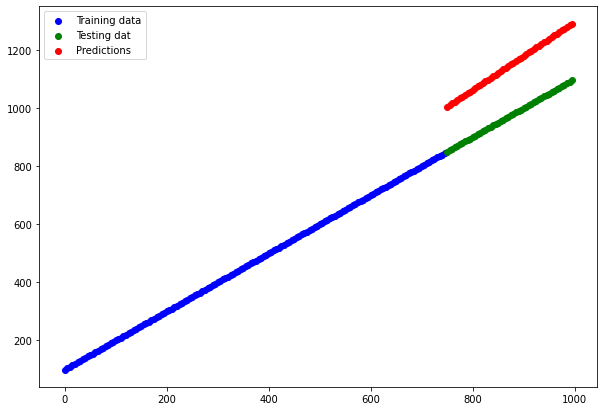

In [114]:
y_reg_predict = model.predict(y_reg_test)

plt.figure(figsize = (10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Testing dat")
plt.scatter(X_reg_test, y_reg_predict.squeeze(), c="r", label="Predictions")
plt.legend()

## 지금까지의 모델을 선형으로만 처리를 했다!
## Non-linearity = Non-straight (비선형)으로 데이터를 보는 시작이 필요하다! 

In [128]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1),
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"]
)

model.fit(X, y, epochs = 100)

c:\Users\user\Desktop\Git\StudyCV\CV_WEEK05_2\venv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2380 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0223 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8296 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7654 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6464 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.4960 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3803 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.2273 - accura

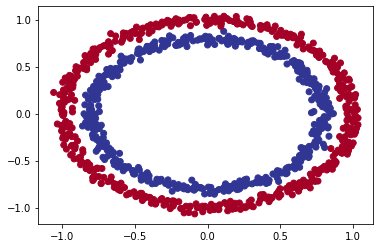

In [116]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

Binary Classfication


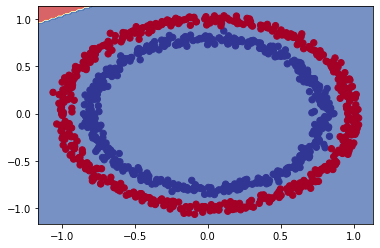

In [117]:
plot_decision_boundary(model, X, y)

In [129]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1),
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

model.fit(X, y, epochs = 100, verbose=0)

Binary Classfication


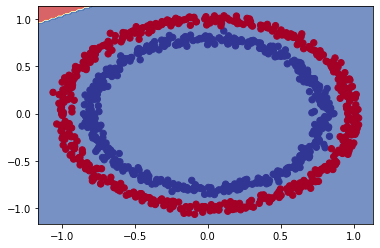

In [130]:
plot_decision_boundary(model, X, y)

In [120]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),

])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)
model.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [121]:
model.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.29480037093162537, 0.9909999966621399]

Binary Classfication


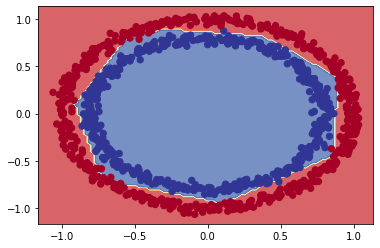

In [122]:
plot_decision_boundary(model, X, y)

In [123]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

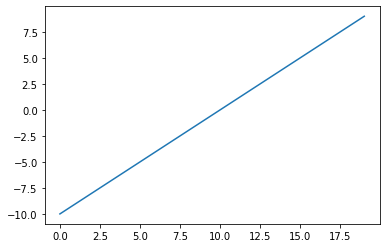

In [124]:
plt.plot(A)

In [125]:
def sigmoid(x):
    return 1/(1+tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

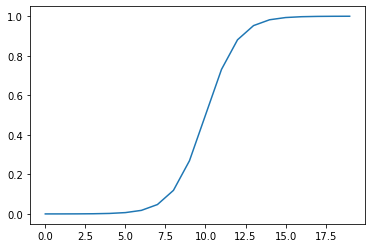

In [126]:
plt.plot(sigmoid(A))

In [131]:
def relu(x):
    return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

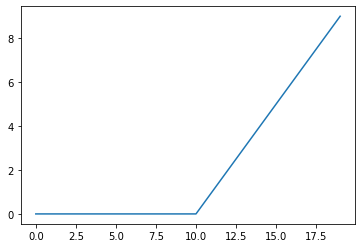

In [132]:
plt.plot(relu(A))

In [133]:
len(X)

1000

In [134]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape

((800, 2), (200, 2))

In [135]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["accuracy"]
)

model.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6834 - accuracy: 0.5550
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5630
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.5600
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.5960
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6553 - accuracy: 0.5850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.6360
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.6890
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.8090
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8550
Epoch 11/